# Cell Index - ```RFR.assign_cells()```

In [1]:
from datetime import date
import geopandas as gpd
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
mpl.rcdefaults()
rc = {
    'figure.facecolor': 'black',
    'figure.figsize': (6.75, 4),  # Values for JLab - (6.0, 4.0) default

    'xtick.color': 'white',
    'xtick.major.size': 3,
    'xtick.top': False,
    'xtick.bottom': False,

    'ytick.color': 'white',
    'ytick.major.size': 3,
    'ytick.left': False,
    'ytick.right': False,

    'axes.facecolor': '#100000',
    'axes.edgecolor': 'black',
    'axes.labelcolor': 'white',
    'axes.grid': True,
    'axes.axisbelow': True,

    'text.color': 'white',

#     'label.shadow': True,
#     'label.framealpha': 1.0,

    'grid.color': '#250000',
}
mpl.rcParams.update(rc)

Antes de la manipulación

In [2]:
df1 = pd.read_pickle('./../predictivehp/data/data.pkl')  #  data: incidentes
df1.head()

,x,y,date,month1,y_day,geometry,Cell
0,2.526789e+06,6.972383e+06,2017-01-01,January,1,POINT (-10762732.147 3866446.908),211850
1,2.525848e+06,6.971430e+06,2017-01-01,January,1,POINT (-10763078.820 3866105.863),210215
2,2.483264e+06,6.927857e+06,2017-01-01,January,1,POINT (-10778752.830 3850517.449),124651
3,2.504030e+06,6.966014e+06,2017-01-01,January,1,POINT (-10771013.068 3864269.723),167220
4,2.479656e+06,6.956554e+06,2017-01-01,January,1,POINT (-10779893.534 3860971.912),118771


In [3]:
df1.Cell.min(), df1.Cell.max()

(27909, 284082)

In [4]:
df2 = pd.read_pickle('./../predictivehp/data/X.pkl')  #  X: celdas en la malla
df2.head()

Incidents_0                                          \
      2017-10-04 00:00:00 2017-10-11 00:00:00 2017-10-18 00:00:00   
20695                   0                   0                   0   
21237                   0                   0                   0   
21238                   0                   0                   0   
21239                   0                   0                   0   
21240                   0                   0                   0   

                                                      Incidents_1  \
      2017-10-25 00:00:00 2017-11-01 00:00:00 2017-10-04 00:00:00   
20695                   0                   0                   0   
21237                   0                   0                   0   
21238                   0                   0                   0   
21239                   0                   0                   0   
21240                   0                   0                   0   

                                                                   \
      2017-10-11 00:00:00 2017-10-18 00:00:00 2017-10-25 00:00:00   
20695                   0                   0                   0   
21237                   0                   0                   0   
21238                   0                   0                   0   
21239                   0                   0                   0   
21240                   0                   0                   0   

                           ...         Incidents_6                      \
      2017-11-01 00:00:00  ... 2017-10-25 00:00:00 2017-11-01 00:00:00   
20695                   0  ...                   0                   0   
21237                   0  ...                   0                   0   
21238                   0  ...                   0                   0   
21239                   0  ...                   0                   0   
21240                   0  ...                   0                   0   

              Incidents_7                                          \
      2017-10-04 00:00:00 2017-10-11 00:00:00 2017-10-18 00:00:00   
20695                   0                   0                   0   
21237                   0                   0                   0   
21238                   0                   0                   0   
21239                   0                   0                   0   
21240                   0                   0                   0   

                                               \
      2017-10-25 00:00:00 2017-11-01 00:00:00   
20695                   0                   0   
21237                   0                   0   
21238                   0                   0   
21239                   0                   0   
21240                   0                   0   

                                           geometry Dangerous Dangerous_pred  
                                                                              
20695  POINT (-10797988.46009712 3845236.298120889)         0       0.026946  
21237  POINT (-10797888.18396486 3845035.721801796)         0       0.026946  
21238  POINT (-10797888.18396486 3845136.009961343)         0       0.026946  
21239  POINT (-10797888.18396486 3845236.298120889)         0       0.026946  
21240  POINT (-10797888.18396486 3845336.586280436)         0       0.026946  

[5 rows x 43 columns]

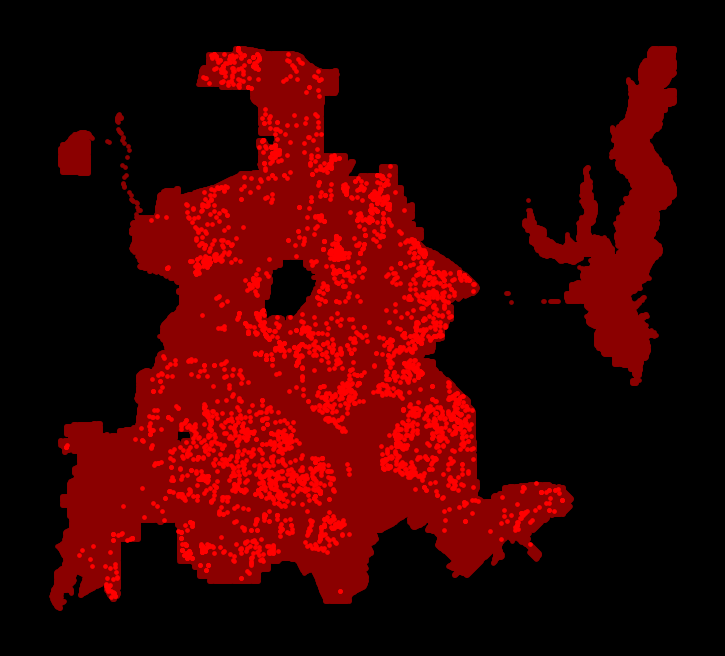

In [5]:
aux1 = gpd.GeoDataFrame(df1)
aux2 = gpd.GeoDataFrame(df2)

fig, ax = plt.subplots()
aux2.plot(ax=ax, markersize=0.5, color='darkred')
aux1.plot(ax=ax, markersize=0.5, color='r')
ax.set_axis_off()
plt.show()

Manipulación

In [6]:
df1 = pd.DataFrame(
    df1[(date(2017, 11, 1) <= df1.date) & (df1.date <= date(2017, 11, 7))]
)
df1.drop(columns='geometry', inplace=True)
df1.columns = pd.MultiIndex.from_product([df1.columns, ['']])
df1.set_index('Cell', drop=True, inplace=True)

df2.index.name = 'Cell'

In [ ]:
df1.head()

In [ ]:
df2.head()

In [ ]:
df2.describe()

Intersección entre los índices (de celdas) de ambos df's

In [1]:
df1_idx = set(df1.index.to_list())
df2_idx = set(df2.index.to_list())

df1_idx.intersection(df2_idx) is not {}

NameError: name 'df1' is not defined

In [8]:
df1.join(df2)

x             y        date    month1 y_day  \
                                                                 
Cell                                                             
71972   2.455844e+06  6.951820e+06  2017-11-02  November   306   
74133   2.457128e+06  6.947692e+06  2017-11-07  November   311   
76387   2.457980e+06  6.969372e+06  2017-11-07  November   311   
87226   2.463652e+06  6.957989e+06  2017-11-07  November   311   
89333   2.464922e+06  6.939013e+06  2017-11-05  November   309   
...              ...           ...         ...       ...   ...   
220491  2.531488e+06  6.955168e+06  2017-11-01  November   305   
228686  2.535538e+06  6.964914e+06  2017-11-01  November   305   
230327  2.536157e+06  6.967431e+06  2017-11-04  November   308   
231929  2.537225e+06  6.958926e+06  2017-11-04  November   308   
236280  2.539382e+06  6.958845e+06  2017-11-07  November   311   

               Incidents_0                                          \
       2017-10-04 00:00:00 2017-10-11 00:00:00 2017-10-18 00:00:00   
Cell                                                                 
71972                  0.0                 0.0                 0.0   
74133                  0.0                 0.0                 0.0   
76387                  0.0                 0.0                 0.0   
87226                  0.0                 0.0                 0.0   
89333                  0.0                 0.0                 0.0   
...                    ...                 ...                 ...   
220491                 0.0                 0.0                 0.0   
228686                 0.0                 0.0                 0.0   
230327                 0.0                 0.0                 0.0   
231929                 0.0                 0.0                 0.0   
236280                 0.0                 0.0                 0.0   

                                                ...         Incidents_6  \
       2017-10-25 00:00:00 2017-11-01 00:00:00  ... 2017-10-25 00:00:00   
Cell                                            ...                       
71972                  0.0                 1.0  ...                 0.0   
74133                  0.0                 1.0  ...                 0.0   
76387                  0.0                 1.0  ...                 0.0   
87226                  0.0                 1.0  ...                 0.0   
89333                  0.0                 1.0  ...                 0.0   
...                    ...                 ...  ...                 ...   
220491                 0.0                 1.0  ...                 0.0   
228686                 0.0                 1.0  ...                 0.0   
230327                 0.0                 1.0  ...                 0.0   
231929                 0.0                 1.0  ...                 0.0   
236280                 0.0                 1.0  ...                 0.0   

                                   Incidents_7                      \
       2017-11-01 00:00:00 2017-10-04 00:00:00 2017-10-11 00:00:00   
Cell                                                                 
71972                  0.0                 0.0                 0.0   
74133                  0.0                 0.0                 0.0   
76387                  0.0                 0.0                 0.0   
87226                  0.0                 0.0                 0.0   
89333                  0.0                 0.0                 0.0   
...                    ...                 ...                 ...   
220491                 0.0                 0.0                 0.0   
228686                 0.0                 0.0                 0.0   
230327                 0.0                 0.0                 0.0   
231929                 0.0                 0.0                 1.0   
236280                 0.0                 0.0                 0.0   

                                                                    \
       2017